# Testing Python - first steps using linear algebra

By convention, we import packages at the top of the file

In [1]:
import matplotlib.pyplot as plt
import numpy
numpy.set_printoptions(linewidth=200, precision=5, floatmode='fixed', suppress=True, )

In the computing lab on tensor network renormalization, we will define tensors as multidimensional arrays. Here is 4-dimensional example.

That way we also see how to define a function.

In [2]:
def define_array():
    return numpy.arange(1, 4**4 + 1).reshape((4,4,4,4))

In [3]:
test_array = define_array()

In [4]:
test_array[:,:,0,0] # notice that arrays in Python are 0-indexed, whereas arrays in Julia are 1-indexed

array([[  1,  17,  33,  49],
       [ 65,  81,  97, 113],
       [129, 145, 161, 177],
       [193, 209, 225, 241]])

Tensor network renormalization algorithms employ a singular value decomposition at some point in order to split a tensor into two parts.

A singular value decomposition is a decomposition of a matrix $M$, similar to the eigenvalue decomposition. The singular value decomposition is more general and can be applied to all matrices, e.g. with different numbers of rows and columns.

$M_{AB} = \sum_{i=1}^N U_{Ai} \lambda_i (V^\dagger)_{iB}$

Each matrix is split into two matrices of singular vectors, with a diagonal matrix of singular values $\lambda_i$. The matrices $U$ and $V$ are unitary. The singular values $\lambda_i$ are ordered in size $\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_N$ and always greater or equal to zero.

We will use the latter fact to approximate a matrix, by a matrix of smaller rank by truncating the number of singular values. In fact this is the best possible approximation.

In [5]:
len(test_array[:,0,0,0]) # This returns the index range of the first index of test_array, also: test_array.shape[0]

4

In [6]:
def define_matrix(array: numpy.ndarray):
    return array.reshape((16,16))

In [7]:
test_matrix = define_matrix(test_array)

In [8]:
test_matrix

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16],
       [ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32],
       [ 33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48],
       [ 49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64],
       [ 65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80],
       [ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96],
       [ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112],
       [113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128],
       [129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144],
       [145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160],
       [161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176],
       [177, 178, 179

Now we will split this matrix via a SVD. The algorithm is called `numpy.linalg.svd`

In [9]:
u, s, vh = numpy.linalg.svd(test_matrix)

In [10]:
u

array([[-0.01454, -0.47721,  0.87826,  0.02659,  0.00138,  0.00060,  0.00229, -0.00145, -0.00081,  0.00049, -0.00090,  0.00013,  0.00023, -0.00078,  0.00011, -0.00010],
       [-0.04152, -0.43016, -0.22940, -0.15451, -0.56897,  0.50976,  0.01737,  0.06293, -0.27682, -0.18165, -0.13803,  0.11110, -0.00585,  0.06244,  0.06274, -0.00038],
       [-0.06850, -0.38312, -0.20885, -0.03212,  0.18812, -0.43933,  0.47300,  0.37627,  0.02678, -0.41526, -0.14990, -0.01215, -0.04321, -0.04242, -0.10194, -0.01830],
       [-0.09547, -0.33607, -0.18186, -0.02257,  0.15410,  0.10300, -0.46629,  0.03127,  0.72191, -0.04251, -0.09215,  0.20507, -0.04909,  0.11362, -0.05105, -0.01282],
       [-0.12245, -0.28902, -0.15569, -0.11126, -0.26261, -0.31009, -0.00882, -0.46950,  0.03522,  0.14825,  0.32312, -0.18798,  0.24920, -0.17553, -0.46865, -0.06092],
       [-0.14943, -0.24198, -0.13290, -0.07267,  0.30788,  0.12255, -0.02626,  0.03207, -0.16141,  0.49673, -0.44753, -0.54024, -0.02917,  0.08838, -0.0434

In [11]:
s # returns S / vector of singular values
# It drops off quickly!

array([2371.46977,   36.70298,    0.00000,    0.00000,    0.00000,    0.00000,    0.00000,    0.00000,    0.00000,    0.00000,    0.00000,    0.00000,    0.00000,    0.00000,    0.00000,    0.00000])

In [12]:
vh.T

array([[-0.23893,  0.41334,  0.32828, -0.81403, -0.01760, -0.02410,  0.00280, -0.01864,  0.01497,  0.00261, -0.00858, -0.00028, -0.00140, -0.00626,  0.00737,  0.00047],
       [-0.24040,  0.35913, -0.13914,  0.16630,  0.80068,  0.26551, -0.07009,  0.16925,  0.00480, -0.01867,  0.09362, -0.09541,  0.03694, -0.01308, -0.03606, -0.00079],
       [-0.24186,  0.30492, -0.10611,  0.19579, -0.17660, -0.15736,  0.02206, -0.00691,  0.15784,  0.39657,  0.05486,  0.06213,  0.10344,  0.52523,  0.51446,  0.04657],
       [-0.24332,  0.25070, -0.07037,  0.17086, -0.19752, -0.03140, -0.00515, -0.10836, -0.55472, -0.15663,  0.26890,  0.10310, -0.32160, -0.40223,  0.31423, -0.11350],
       [-0.24479,  0.19649, -0.03662,  0.17038, -0.15814, -0.23973,  0.17401,  0.01184,  0.11390,  0.20320, -0.16350, -0.36624,  0.16686, -0.21740, -0.32592, -0.60145],
       [-0.24625,  0.14228, -0.37987, -0.00878, -0.21824, -0.07786, -0.13691,  0.37627,  0.11572, -0.33133, -0.34787,  0.02928, -0.45051,  0.19714, -0.2328

We can reconstruct the matrix test_matrix from the SVD data

In [13]:
numpy.dot(numpy.dot(u, numpy.diag(s)), vh)

array([[  1.00000,   2.00000,   3.00000,   4.00000,   5.00000,   6.00000,   7.00000,   8.00000,   9.00000,  10.00000,  11.00000,  12.00000,  13.00000,  14.00000,  15.00000,  16.00000],
       [ 17.00000,  18.00000,  19.00000,  20.00000,  21.00000,  22.00000,  23.00000,  24.00000,  25.00000,  26.00000,  27.00000,  28.00000,  29.00000,  30.00000,  31.00000,  32.00000],
       [ 33.00000,  34.00000,  35.00000,  36.00000,  37.00000,  38.00000,  39.00000,  40.00000,  41.00000,  42.00000,  43.00000,  44.00000,  45.00000,  46.00000,  47.00000,  48.00000],
       [ 49.00000,  50.00000,  51.00000,  52.00000,  53.00000,  54.00000,  55.00000,  56.00000,  57.00000,  58.00000,  59.00000,  60.00000,  61.00000,  62.00000,  63.00000,  64.00000],
       [ 65.00000,  66.00000,  67.00000,  68.00000,  69.00000,  70.00000,  71.00000,  72.00000,  73.00000,  74.00000,  75.00000,  76.00000,  77.00000,  78.00000,  79.00000,  80.00000],
       [ 81.00000,  82.00000,  83.00000,  84.00000,  85.00000,  86.00000,  

Let us try to approximate the matrix by another matrix of lower rank.

Let us start with rank 1.

In [14]:
numpy.outer(u[:,0] * s[0], vh[0,:]) # Notation is always a bit subtle
# the transpose is necessary to create a matrix

array([[  8.23970,   8.29016,   8.34061,   8.39107,   8.44153,   8.49199,   8.54245,   8.59291,   8.64337,   8.69383,   8.74429,   8.79475,   8.84521,   8.89567,   8.94613,   8.99659],
       [ 23.52596,  23.67003,  23.81410,  23.95817,  24.10224,  24.24632,  24.39039,  24.53446,  24.67853,  24.82260,  24.96667,  25.11074,  25.25482,  25.39889,  25.54296,  25.68703],
       [ 38.81222,  39.04990,  39.28759,  39.52527,  39.76295,  40.00064,  40.23832,  40.47600,  40.71369,  40.95137,  41.18906,  41.42674,  41.66442,  41.90211,  42.13979,  42.37747],
       [ 54.09848,  54.42978,  54.76107,  55.09237,  55.42366,  55.75496,  56.08626,  56.41755,  56.74885,  57.08014,  57.41144,  57.74273,  58.07403,  58.40533,  58.73662,  59.06792],
       [ 69.38474,  69.80965,  70.23456,  70.65947,  71.08438,  71.50928,  71.93419,  72.35910,  72.78401,  73.20891,  73.63382,  74.05873,  74.48364,  74.90854,  75.33345,  75.75836],
       [ 84.67101,  85.18953,  85.70805,  86.22657,  86.74509,  87.26361,  

In [15]:
numpy.outer(u[:,0] * s[0], vh[0,:].T) + \
numpy.outer(u[:,1] * s[1], vh[1,:].T) # Python understand that you want to add two matrices (element-wise)

array([[  1.00000,   2.00000,   3.00000,   4.00000,   5.00000,   6.00000,   7.00000,   8.00000,   9.00000,  10.00000,  11.00000,  12.00000,  13.00000,  14.00000,  15.00000,  16.00000],
       [ 17.00000,  18.00000,  19.00000,  20.00000,  21.00000,  22.00000,  23.00000,  24.00000,  25.00000,  26.00000,  27.00000,  28.00000,  29.00000,  30.00000,  31.00000,  32.00000],
       [ 33.00000,  34.00000,  35.00000,  36.00000,  37.00000,  38.00000,  39.00000,  40.00000,  41.00000,  42.00000,  43.00000,  44.00000,  45.00000,  46.00000,  47.00000,  48.00000],
       [ 49.00000,  50.00000,  51.00000,  52.00000,  53.00000,  54.00000,  55.00000,  56.00000,  57.00000,  58.00000,  59.00000,  60.00000,  61.00000,  62.00000,  63.00000,  64.00000],
       [ 65.00000,  66.00000,  67.00000,  68.00000,  69.00000,  70.00000,  71.00000,  72.00000,  73.00000,  74.00000,  75.00000,  76.00000,  77.00000,  78.00000,  79.00000,  80.00000],
       [ 81.00000,  82.00000,  83.00000,  84.00000,  85.00000,  86.00000,  

## Simple Plot

As a last step, let us plot something to test whether plot is working.

Let us just plot 10 random numbers

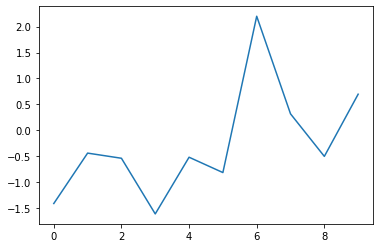

In [17]:
plt.plot(numpy.random.randn(10))
plt.show() # if this plot looks ugly, there are alternative packages like bokeh and plotly

In [19]:
xs = numpy.arange(0, 2*numpy.pi)
y1 = numpy.cos(xs)
y2 = numpy.sin(xs)

In [ ]:
plt.plot()